In [200]:
print("all ok")

all ok


In [201]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

In [202]:
model="deepseek-r1-distill-llama-70b"

### Load the model

In [ ]:
model="deepseek-r1-distill-llama-70b"
from langchain_groq import ChatGroq
llm=ChatGroq(model_name=model)
llm.invoke("hi")

In [7]:
llm=ChatGroq(model_name=model)

In [9]:
llm.invoke("hi")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.087357086, 'prompt_time': 5.5279e-05, 'queue_time': 0.054406841000000004, 'total_time': 0.087412365}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--2e7407f0-2868-4c12-a12b-47e7e15895d0-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [11]:
print(llm.invoke("hi").content)

<think>

</think>

Hello! How can I assist you today? 😊


In [153]:
# import operator
# from typing import List
# from langgraph.graph.message import add_messages
# from pydantic import BaseModel , Field
# from typing import TypedDict, Annotated, Sequence
# from langchain_core.messages import BaseMessage
# from langchain_core.output_parsers import StrOutputParser
# from langchain_core.prompts import ChatPromptTemplate, PromptTemplate

from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode

In [85]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [154]:
# HumanMessage("hi how are you?")

In [155]:
# HumanMessage(["hi how are you?"])

### this code is only for the testing

In [84]:

state={"messages":["hi hello how are you?"]}
call_model(state)

this is my current message: content='hi hello how are you?' additional_kwargs={} response_metadata={}


In [ ]:
from langchain_core.messages import AnyMessage
class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]


class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

## Design a simple workflow without tool calling/

In [156]:
workflow=StateGraph(MessagesState)

In [157]:
workflow.add_node("mybot",call_model)

In [88]:
workflow.add_edge(START,"mybot")

In [89]:
workflow.add_edge("mybot",END)

In [90]:
app=workflow.compile()

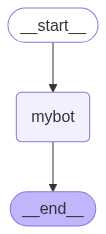

In [91]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [92]:
input={"messages":["hi hello how are you?"]}

In [93]:
app.invoke(input)

{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='877b56b0-acc1-4f71-81af-0835818bf1f9'),
  AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.184463599, 'prompt_time': 0.000213596, 'queue_time': 0.053161349, 'total_time': 0.184677195}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--138951e1-e20a-4640-af6f-b56404438f14-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}

In [94]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from mybot Node
_______
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.187418124, 'prompt_time': 0.000211927, 'queue_time': 0.053487063, 'total_time': 0.187630051}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--eb76b092-eeb7-4986-9683-5349fa708176-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}




### this is a workflow with tool calling

In [95]:
@tool
def search(query:str):
    """this is my custom tool for searching a weather"""
    if "delhi" in query.lower():
        return "the temp is 45 degree and sunny"
    return "the temp is 25 degree and cloudy"

## testing a tool

In [96]:
search.invoke("what is a tempurature in kashmir?")

'the temp is 25 degree and cloudy'

In [97]:
search.invoke("what is a tempurature in delhi?")

'the temp is 45 degree and sunny'

In [99]:
search

StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000020AA714F760>)

In [106]:
llm.invoke("what is a weather in delhi?")

AIMessage(content='<think>\n\n</think>\n\nAs of my last update in July 2024, I cannot provide real-time weather information. However, Delhi typically experiences a hot and humid climate during the summer months (April to June), with temperatures often reaching 40°C (104°F) or higher. The monsoon season usually arrives in July, bringing heavy rainfall and relief from the heat. Winters in Delhi (December to February) are cool and can be quite foggy, with temperatures sometimes dropping to around 5°C (41°F). Spring (March to April) and autumn (September to November) are generally pleasant, with mild temperatures.\n\nFor the most accurate and up-to-date weather information, I recommend checking a reliable weather service or app.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 148, 'prompt_tokens': 11, 'total_tokens': 159, 'completion_time': 0.538181818, 'prompt_time': 0.000276655, 'queue_time': 0.057447765, 'total_time': 0.538458473}, 'model_name': 'deepseek

### Binding a tool to the LLM

### Special Note: use some good for agentic workflow since opensource model might not give you the correct output

In [158]:
tools=[search]

In [159]:
llm_with_tool=llm.bind_tools(tools)

### testig my llm_with_tool

In [160]:
response=llm_with_tool.invoke("what is a weather is delhi?")

In [161]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'fkt7mnrrc', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 154, 'prompt_tokens': 133, 'total_tokens': 287, 'completion_time': 0.661548062, 'prompt_time': 0.008566271, 'queue_time': 0.054379952999999995, 'total_time': 0.670114333}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--ee88ad0a-579f-410f-85e3-69ec33e4a015-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': 'fkt7mnrrc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 154, 'total_tokens': 287})

In [107]:
response.content

''

In [105]:
response.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Delhi'},
  'id': 't33tessyq',
  'type': 'tool_call'}]

In [142]:
def call_model(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

### Testing code

In [109]:
input={"messages":["what is a weather in delhi?"]}

In [111]:
response=call_model(input)

In [114]:
response["messages"][-1].content

''

In [115]:
response["messages"][-1].tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Delhi'},
  'id': '5v4m56dw7',
  'type': 'tool_call'}]

### here my router function

#### now whatever will come from call_model router funtion will redirect this to the appropriate tool

In [162]:
def router_function(state:MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END
    

In [120]:
tools

[StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000020AA714F760>)]

In [144]:

tool_node=ToolNode(tools)

In [122]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'search': StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000020AA714F760>)}, tool_to_state_args={'search': {}}, tool_to_store_arg={'search': None}, handle_tool_errors=True, messages_key='messages')

In [173]:
workflow2=StateGraph(MessagesState)

In [ ]:
workflow2.add_node("llmwithtool",call_model)

workflow2.add_node("mytools",tool_node)

workflow2.add_edge(START,"llmwithtool")

workflow2.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})

In [148]:
app2=workflow2.compile()

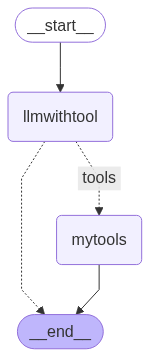

In [149]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [163]:
response=app2.invoke({"messages":["what is a weather in bengraluru?"]})

In [166]:
response["messages"][-1].content

'the temp is 25 degree and cloudy'

In [151]:
app2.invoke({"messages":["what is a weather in delhi?"]})

{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='8b5a1806-00d3-49be-9490-7e56facc94e7'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'sazacftqh', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 146, 'prompt_tokens': 133, 'total_tokens': 279, 'completion_time': 0.636653882, 'prompt_time': 0.0085616, 'queue_time': 0.06742128, 'total_time': 0.645215482}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--e8760b2f-4a59-40c8-a1a7-f010181d899b-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': 'sazacftqh', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 146, 'total_tokens': 279}),
  ToolMessage(content='the temp is 45 degree and sunny', name='search', 

### use good resoning based model

In [152]:
app2.invoke({"messages":["hi how are you?"]})

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='78d29577-ed37-47a7-be3a-ddca23b3d080'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '2s9sy9ebc', 'function': {'arguments': '{"query":"1234567890"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 372, 'prompt_tokens': 130, 'total_tokens': 502, 'completion_time': 1.6485162519999998, 'prompt_time': 0.008328953, 'queue_time': 0.056921826999999994, 'total_time': 1.656845205}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--fc0aa82f-441e-4cc7-b020-8161c30b00f7-0', tool_calls=[{'name': 'search', 'args': {'query': '1234567890'}, 'id': '2s9sy9ebc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 130, 'output_tokens': 372, 'total_tokens': 502}),
  ToolMessage(content='the temp is 25 degree and cloudy', name='search', id='

In [176]:
workflow2.add_edge("mytools","llmwithtool")

In [177]:
app3=workflow2.compile()

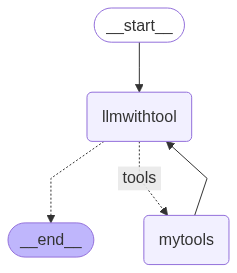

In [179]:
from IPython.display import Image, display
display(Image(app3.get_graph().draw_mermaid_png()))

In [180]:
for output in app3.stream({"messages":["what is a weather in new delhi?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")
    

here is output from llmwithtool
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'm370p69r7', 'function': {'arguments': '{"query":"New Delhi weather"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 121, 'prompt_tokens': 134, 'total_tokens': 255, 'completion_time': 0.570589538, 'prompt_time': 0.010406995, 'queue_time': 0.053362169, 'total_time': 0.580996533}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--9a80691c-3b55-4e11-bd9f-dc4cc32b363a-0', tool_calls=[{'name': 'search', 'args': {'query': 'New Delhi weather'}, 'id': 'm370p69r7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 134, 'output_tokens': 121, 'total_tokens': 255})]}


here is output from mytools
_______
{'messages': [ToolMessage(content='the temp is 45 degree and sunny', name='search', id='970a3353-5364-40c4-b74e-14f0559ef73b', too

In [ ]:
"what is a weather in delhi can you tell me some good hotel for staying in north delhi"

In [181]:
from langgraph.checkpoint.memory import MemorySaver

In [182]:
memory=MemorySaver()

In [183]:
workflow3=StateGraph(MessagesState)

workflow3.add_node("llmwithtool",call_model)

workflow3.add_node("mytools",tool_node)

workflow3.add_edge(START,"llmwithtool")

workflow3.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})

workflow3.add_edge("mytools","llmwithtool")

In [184]:
app4=workflow3.compile(checkpointer=memory)

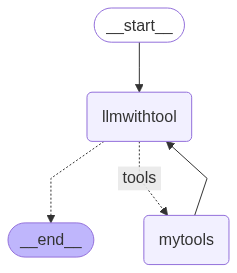

In [185]:
from IPython.display import Image, display
display(Image(app4.get_graph().draw_mermaid_png()))

In [187]:
config={"configurable": {"thread_id": "1"}}

In [190]:
events=app4.stream(
    {"messages":["what is a weather in new delhi?"]},config=config,stream_mode="values"
    )

In [191]:
for event in events:
    event["messages"][-1].pretty_print()
    

================================ Human Message =================================

what is a weather in new delhi?
================================== Ai Message ==================================
Tool Calls:
  search (xjznn9vkf)
 Call ID: xjznn9vkf
  Args:
    query: weather in New Delhi
================================= Tool Message =================================
Name: search

the temp is 45 degree and sunny
================================== Ai Message ==================================

The weather in New Delhi is currently 45 degrees and sunny.


In [192]:
events=app4.stream(
    {"messages":["what is a weather in indore?"]},config=config,stream_mode="values"
    )

In [193]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

what is a weather in indore?
================================== Ai Message ==================================
Tool Calls:
  search (974yyz4yc)
 Call ID: 974yyz4yc
  Args:
    query: weather in Indore
================================= Tool Message =================================
Name: search

the temp is 25 degree and cloudy
================================== Ai Message ==================================
Tool Calls:
  search (z98ty8y88)
 Call ID: z98ty8y88
  Args:
    query: weather in Indore
================================= Tool Message =================================
Name: search

the temp is 25 degree and cloudy
================================== Ai Message ==================================
Tool Calls:
  search (cv0da6bnz)
 Call ID: cv0da6bnz
  Args:
    query: weather in Indore
================================= Tool Message =================================
Name: search

the temp is 25 degree and

In [195]:
config

{'configurable': {'thread_id': '1'}}

In [196]:
memory.get(config)

{'v': 3,
 'ts': '2025-06-14T05:39:36.437057+00:00',
 'id': '1f048e1f-5098-6c90-800c-546d9dcac742',
 'channel_versions': {'__start__': '00000000000000000000000000000007.0.9999317854783963',
  'messages': '00000000000000000000000000000014.0.05050170024719669',
  'branch:to:llmwithtool': '00000000000000000000000000000014.0.8950158264402875',
  'branch:to:mytools': '00000000000000000000000000000013.0.9761122505314639'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000006.0.1517309311235916'},
  'llmwithtool': {'branch:to:llmwithtool': '00000000000000000000000000000013.0.778145138763228'},
  'mytools': {'branch:to:mytools': '00000000000000000000000000000012.0.7239732522974757'}},
 'channel_values': {'messages': [HumanMessage(content='what is a weather in new delhi?', additional_kwargs={}, response_metadata={}, id='e4d2735a-46f0-46c0-b33f-81d443eb29ff'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'xjznn9vkf', 'function': {

In [197]:
events=app4.stream(
    {"messages":["in which city the temp was 25 degree?"]},config=config,stream_mode="values"
    )

In [198]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

in which city the temp was 25 degree?
================================== Ai Message ==================================

The city where the temperature was 25 degrees is **Indore**.


In [199]:
memory.get(config)

{'v': 3,
 'ts': '2025-06-14T05:43:58.859647+00:00',
 'id': '1f048e29-1740-6efe-800f-e46aa6319ec4',
 'channel_versions': {'__start__': '00000000000000000000000000000016.0.4268705610643684',
  'messages': '00000000000000000000000000000017.0.702509649584532',
  'branch:to:llmwithtool': '00000000000000000000000000000017.0.41532138018550335',
  'branch:to:mytools': '00000000000000000000000000000013.0.9761122505314639'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000015.0.6664132989990882'},
  'llmwithtool': {'branch:to:llmwithtool': '00000000000000000000000000000016.0.5325683866610978'},
  'mytools': {'branch:to:mytools': '00000000000000000000000000000012.0.7239732522974757'}},
 'channel_values': {'messages': [HumanMessage(content='what is a weather in new delhi?', additional_kwargs={}, response_metadata={}, id='e4d2735a-46f0-46c0-b33f-81d443eb29ff'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'xjznn9vkf', 'function': {